<a href="https://colab.research.google.com/github/hariprasath1291/personal-site/blob/master/ResNet50_improvised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
!nvidia-smi

Tue Nov 22 17:47:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    29W /  70W |   8398MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [51]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [52]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [53]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [54]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/wildlife_detection/train'
valid_path = '/content/drive/MyDrive/wildlife_detection/test'

In [57]:
SIZE_X = SIZE_Y = 224

datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split = 0.2)

training_set = datagen.flow_from_directory(train_path,
                                       class_mode = "categorical",
                                       target_size = (SIZE_X,SIZE_Y),
                                       color_mode="rgb",
                                       batch_size = 32, 
                                       shuffle = False,
                                       subset='training',
                                       seed = 42)

test_set = datagen.flow_from_directory(valid_path,
                                       class_mode = "categorical",
                                       target_size = (SIZE_X, SIZE_Y),
                                       color_mode="rgb",
                                       batch_size = 32, 
                                       shuffle = False,
                                       subset='validation',
                                       seed = 42)

Found 2269 images belonging to 2 classes.
Found 112 images belonging to 2 classes.


In [58]:
IMAGE_SIZE = [224, 224]

In [59]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [60]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [61]:
flatten = Flatten()(resnet.output)
dense = Dense(128, activation = 'relu')(flatten)
dense = Dense(256, activation = 'relu')(dense)
dense = Dense(300, activation = 'relu')(dense)
dense = Dense(340, activation = 'relu')(dense)
prediction = Dense(2, activation = 'softmax')(dense)

In [62]:
#creating a model
model = Model(inputs = resnet.input, outputs = prediction )

In [63]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [64]:
# COMPILING THE MODEL

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [71]:
#executing the model
history = model.fit_generator(training_set, validation_data = (test_set), epochs = 10, verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
71/71 [==============================] - 42s 597ms/step - loss: 0.0689 - accuracy: 0.9797 - val_loss: 0.2992 - val_accuracy: 0.9464
Epoch 2/10
71/71 [==============================] - 32s 454ms/step - loss: 0.0816 - accuracy: 0.9740 - val_loss: 0.2090 - val_accuracy: 0.9554
Epoch 3/10
71/71 [==============================] - 34s 482ms/step - loss: 0.0793 - accuracy: 0.9775 - val_loss: 0.1854 - val_accuracy: 0.9375
Epoch 4/10
71/71 [==============================] - 36s 504ms/step - loss: 0.0886 - accuracy: 0.9634 - val_loss: 0.1892 - val_accuracy: 0.9464
Epoch 5/10
71/71 [==============================] - 33s 459ms/step - loss: 0.1299 - accuracy: 0.9590 - val_loss: 0.2553 - val_accuracy: 0.9554
Epoch 6/10
71/71 [==============================] - 34s 483ms/step - loss: 0.0639 - accuracy: 0.9714 - val_loss: 0.1820 - val_accuracy: 0.9464
Epoch 7/10
71/71 [==============================] - 32s 455ms/step - loss: 0.0473 - accuracy: 0.9837 - val_loss: 0.2260 - val_accuracy: 0.9464

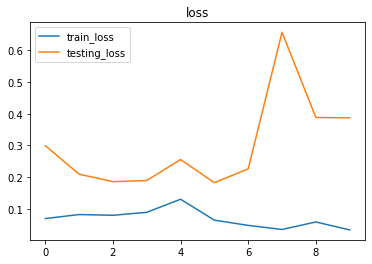

In [72]:
# plotting the loss
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'testing_loss')
plt.title('loss')
plt.legend()
plt.show()

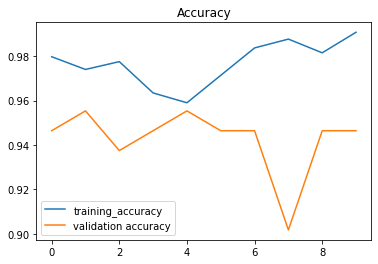

In [73]:
# Both Validation and Training accuracy is shown here

plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [74]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
Y_pred = model.predict_generator(test_set)
y_pred = np.argmax(Y_pred ,axis =1)
print('Confusion Matrix')
confusion_matrix = confusion_matrix(test_set.classes, y_pred)
print(confusion_matrix)
print('Classification Report')
target_names = ['blank','non_blank', ]
print(classification_report(test_set.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


Confusion Matrix
[[56  0]
 [ 6 50]]
Classification Report
              precision    recall  f1-score   support

       blank       0.90      1.00      0.95        56
   non_blank       1.00      0.89      0.94        56

    accuracy                           0.95       112
   macro avg       0.95      0.95      0.95       112
weighted avg       0.95      0.95      0.95       112



In [75]:
result = model.evaluate(test_set,batch_size=128)
print("test_loss, test accuracy",result)

4/4 [==============================] - 2s 331ms/step - loss: 0.3868 - accuracy: 0.9464
test_loss, test accuracy [0.38676717877388, 0.9464285969734192]
